# Produce plots 

In [97]:
import seaborn as sns

In [98]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [101]:
dataset         = 'Hokkaido'
dataset2        = 'hokkaido'
loss            = 'dice'
experiment_name = 'segment_hokk_pretrain_hokk_cnn'
unet            = False
trainsizes=[2,5,10,20,-1]
results={}
for pretraining, experiment_name in zip(['Hokkaido','Kaikoura'],['segment_hokk_pretrain_hokk_cnn','segment_hokk_pretrain_kaik_cnn']):
    results[pretraining]={}
    for trainsize in trainsizes:
        results[pretraining][trainsize]={}
        dict_ = pickle.load(open('scores_{}_{}.pkl'.format(experiment_name,trainsize), 'rb'))
        results[pretraining][trainsize].update(dict_[dataset])

In [157]:
maps ={}
for pretraining, experiment_name in zip(['Hokkaido','Kaikoura'],['segment_hokk_pretrain_hokk_cnn','segment_hokk_pretrain_kaik_cnn']):
    maps[pretraining]={}
    for trainsize in trainsizes:
        maps[pretraining][trainsize]={}
        dict_ = pickle.load(open('label_predictions_{}_{}.pkl'.format(experiment_name,trainsize), 'rb'))
        maps[pretraining][trainsize].update(dict_)

In [179]:
index = 36

def make_seg_plots(index):
    f, ax=plt.subplots(3,5, figsize=(15,9))
    for ii, trainsize in enumerate(trainsizes):
        ax[0,ii].set_title('train size {}'.format(trainsize),fontsize=16)
        if trainsize==-1:
            ax[0,ii].set_title('train size {}'.format(110),fontsize=16)
        ax[0,ii].imshow(maps['Hokkaido'][trainsize]['pretrain']['all'][index]>0.5)
        ax[1,ii].imshow(maps['Kaikoura'][trainsize]['pretrain']['all'][index]>0.5)
        #ax[0,ii].axis('off')
        ax[2,ii].imshow(maps['Hokkaido'][trainsize]['no_pretrain']['all'][index]>0.5)
        #ax[1,ii].set_ylabel(trainsize)
        if trainsize==2:
            ax[0,ii].set_ylabel('Hokkaido pretraining',fontsize=15)
            ax[1,ii].set_ylabel('Kaikoura pretraining',fontsize=15)
            ax[2,ii].set_ylabel('no pretraining',fontsize=15)
        ax[1,ii].set_xticks([])
        ax[1,ii].set_yticks([])
        ax[0,ii].set_xticks([])
        ax[0,ii].set_yticks([])
        ax[2,ii].set_xticks([])
        ax[2,ii].set_yticks([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    ax[0,ii].get_yaxis().set_visible(False)
    plt.show()
    labels = pickle.load(open('test_labels_kokkaido.pkl','rb'))
    plt.axis('off')
    plt.imshow(np.squeeze(labels[index]))

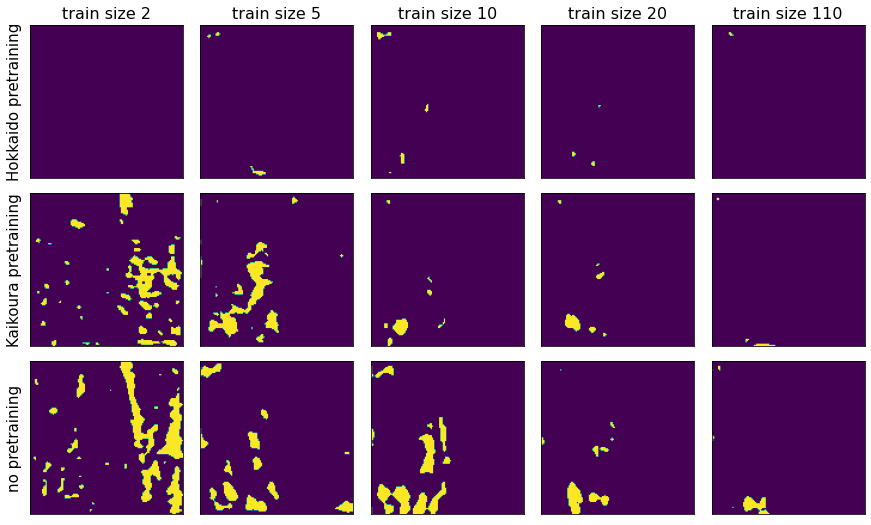

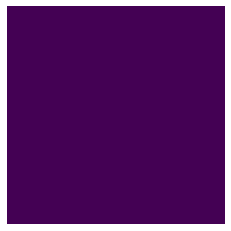

In [187]:
make_seg_plots(32)

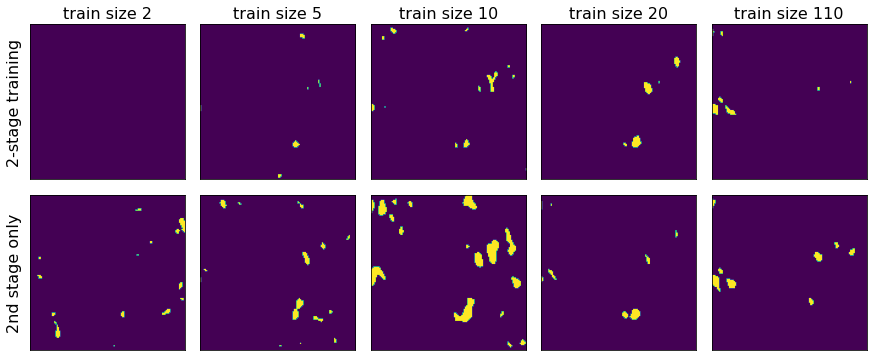

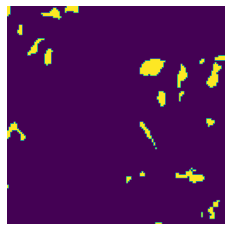

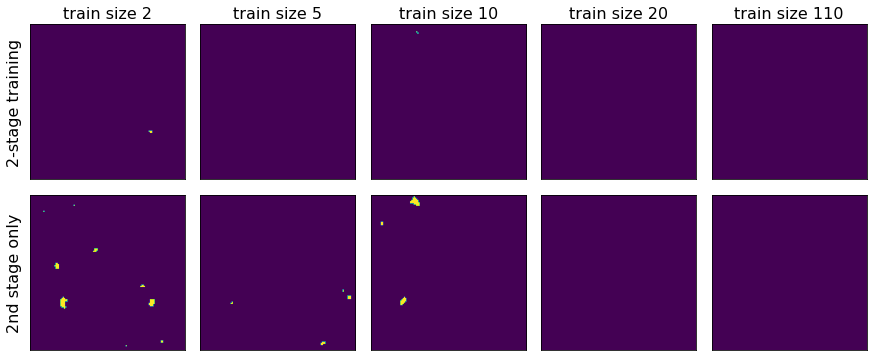

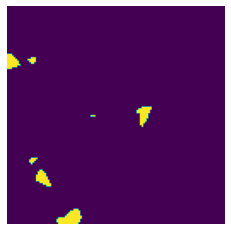

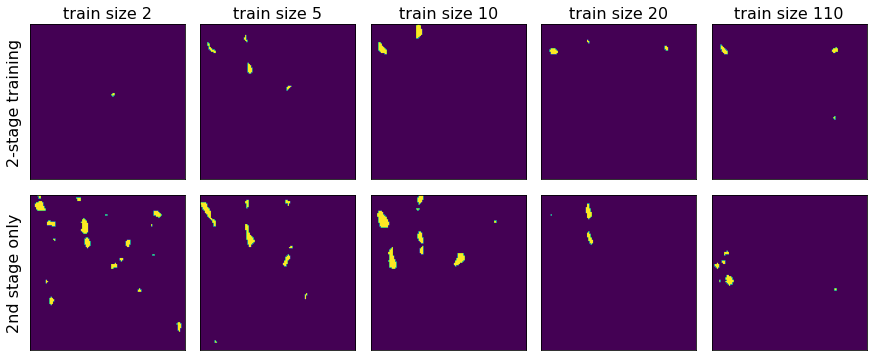

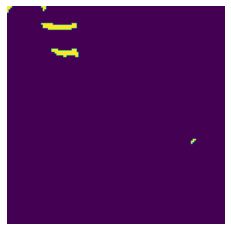

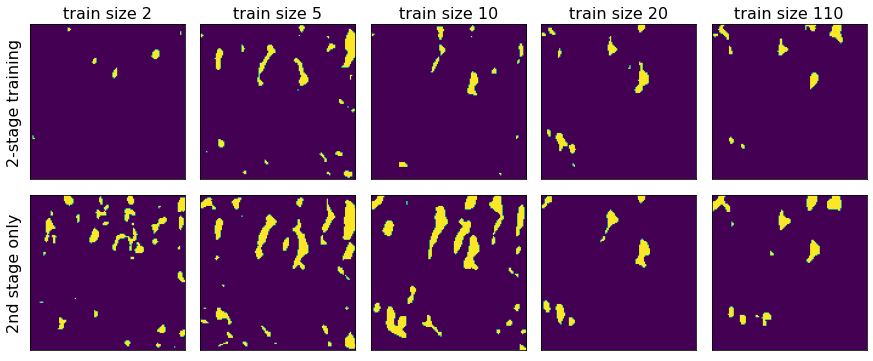

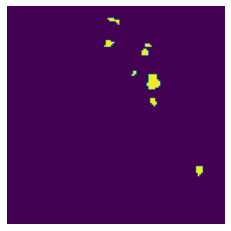

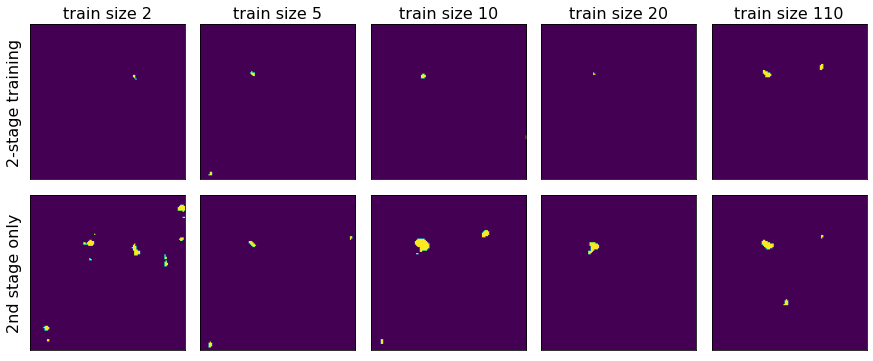

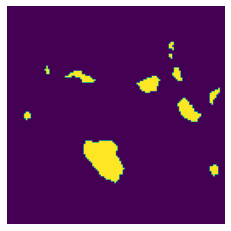

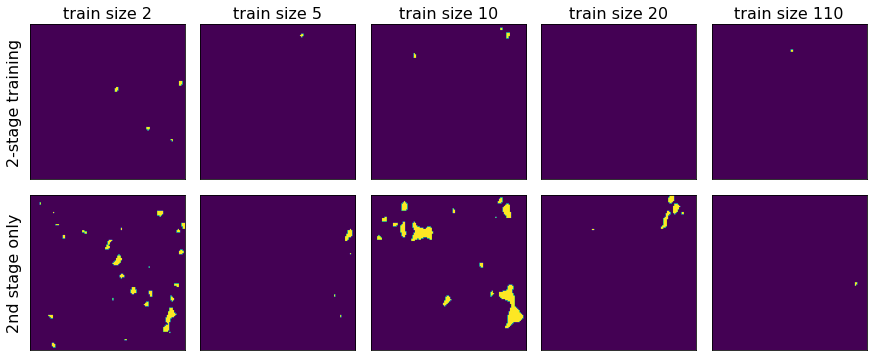

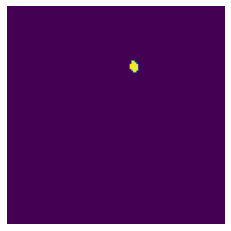

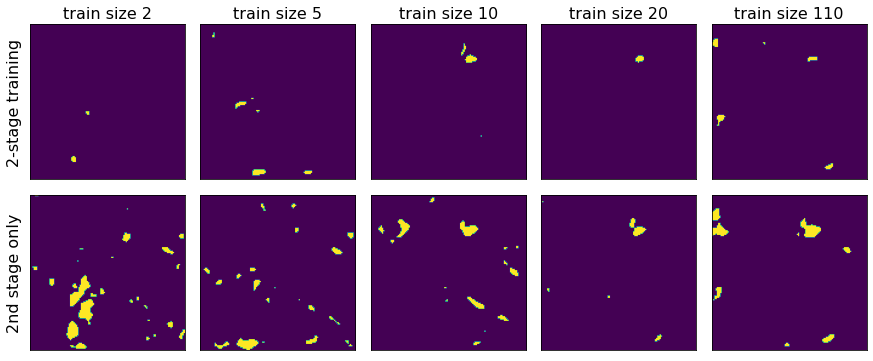

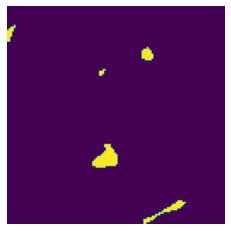

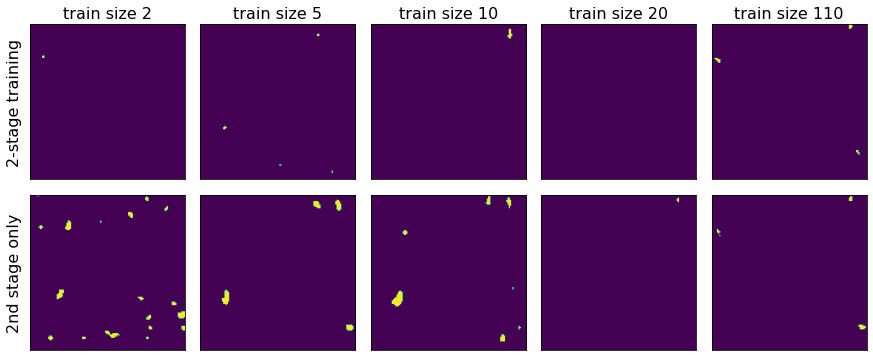

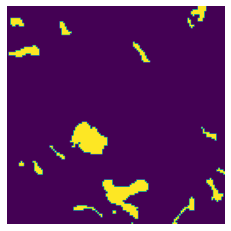

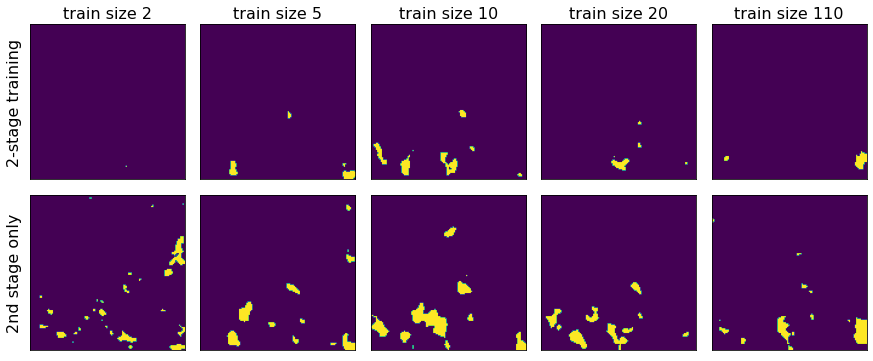

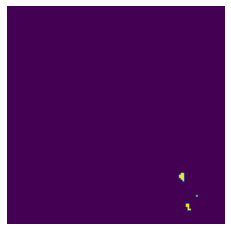

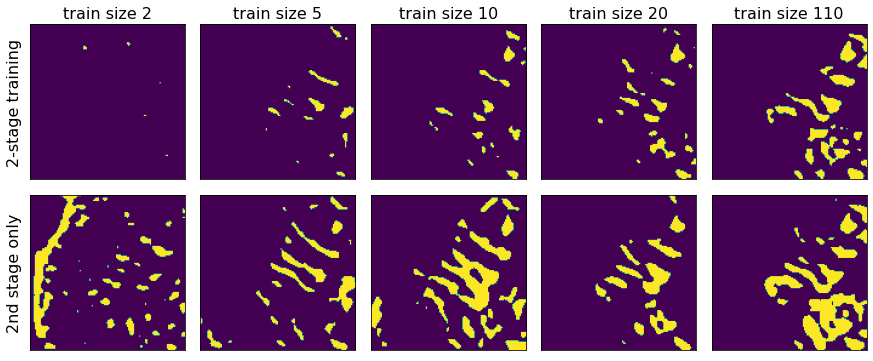

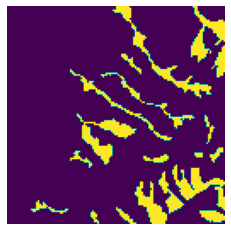

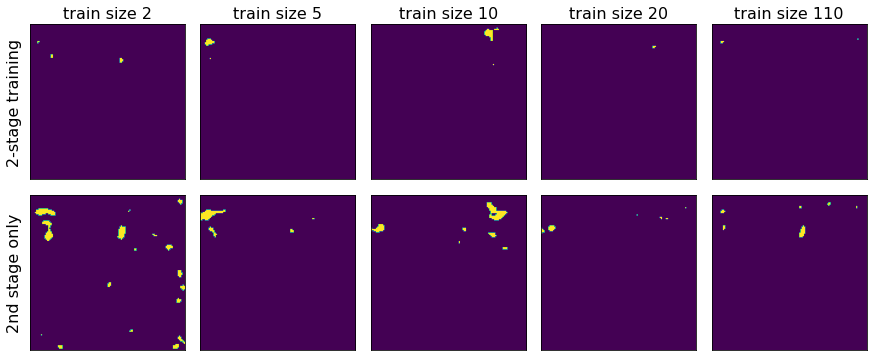

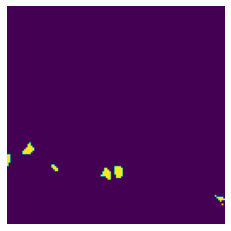

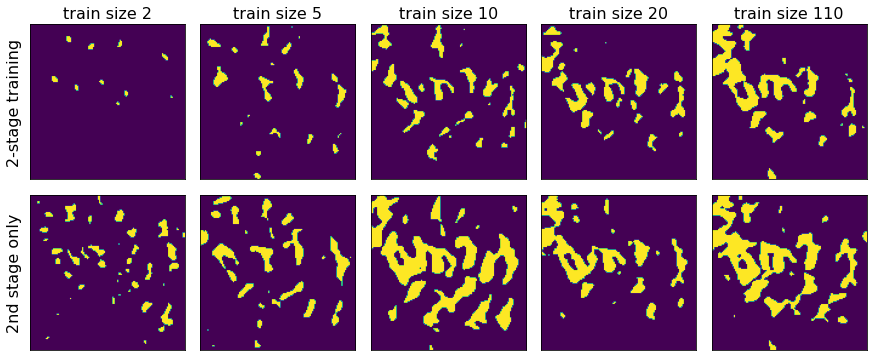

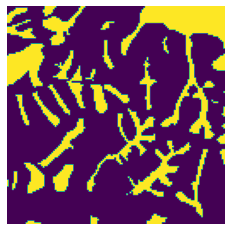

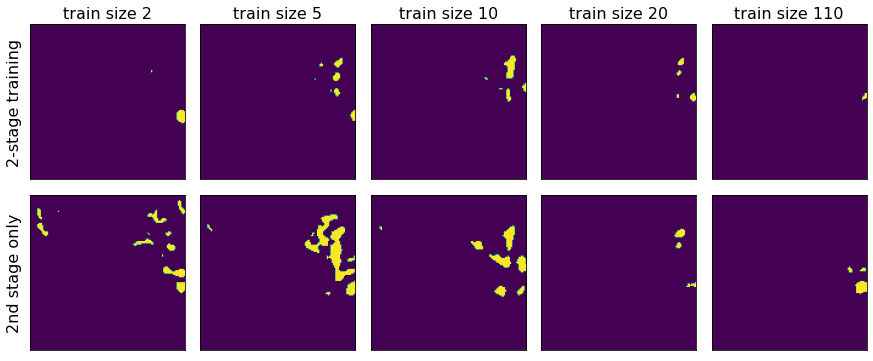

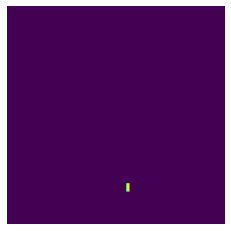

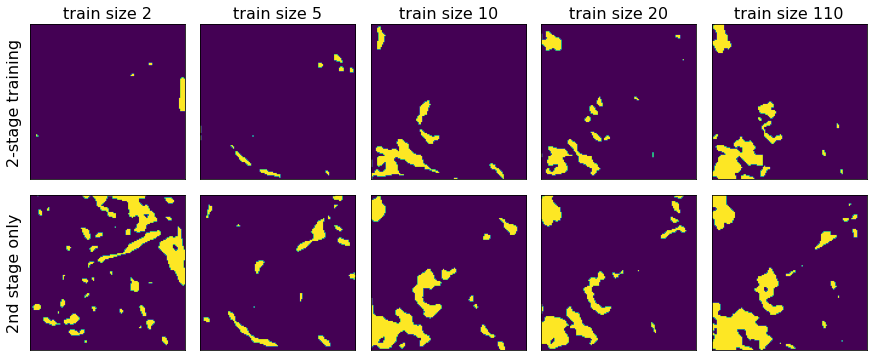

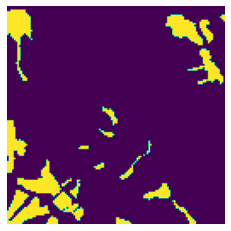

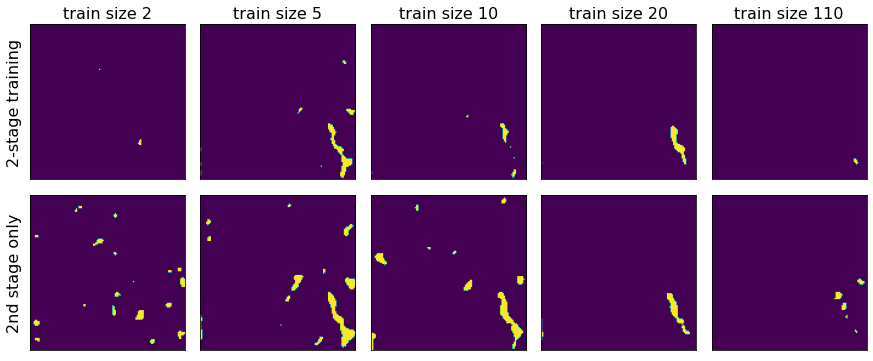

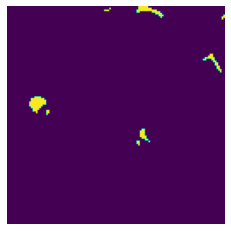

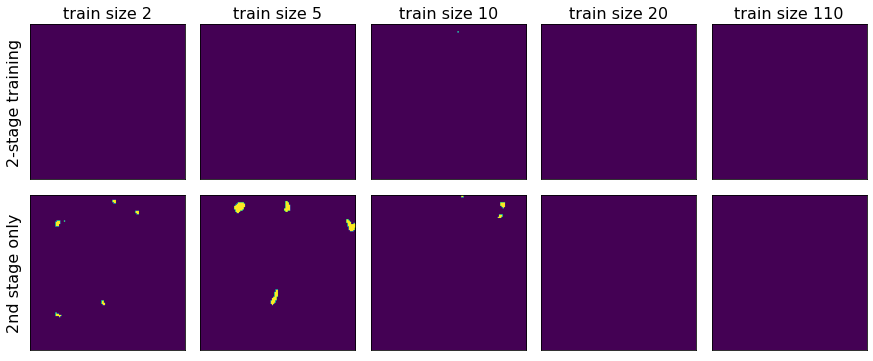

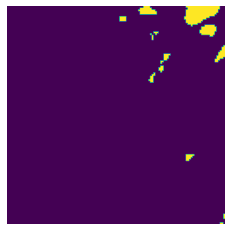

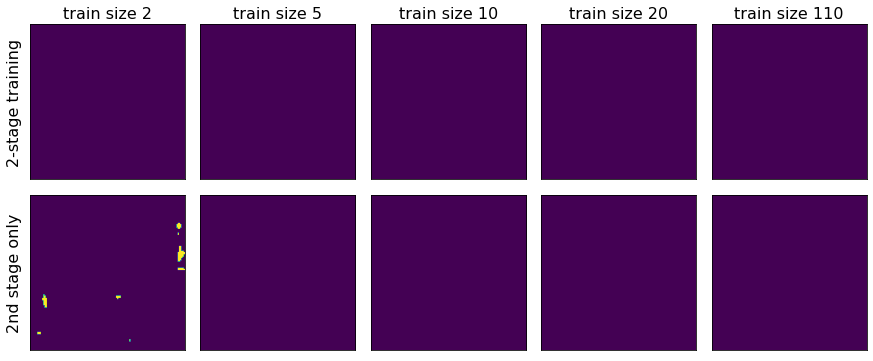

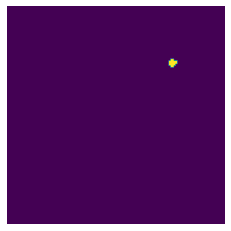

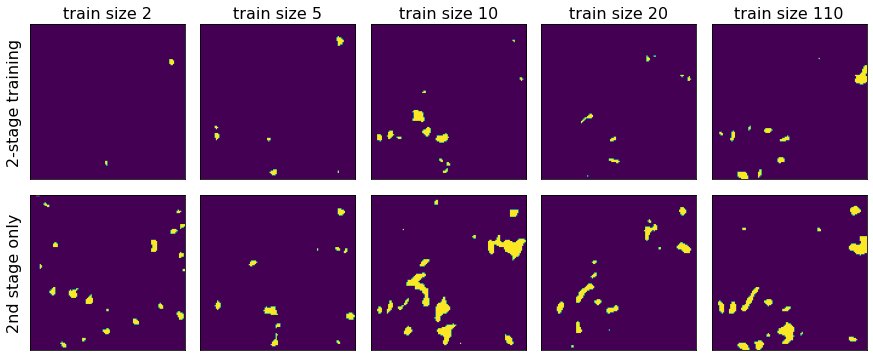

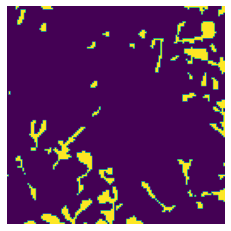

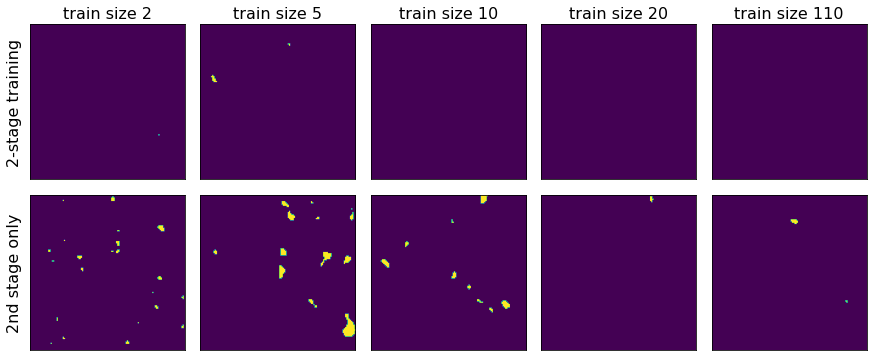

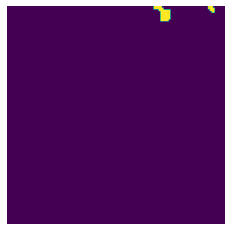

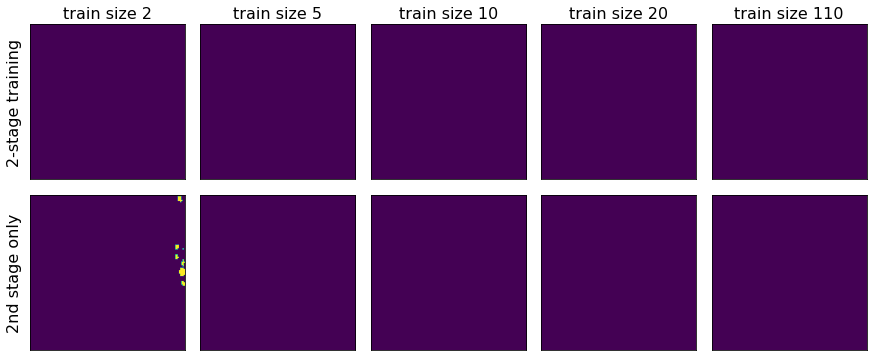

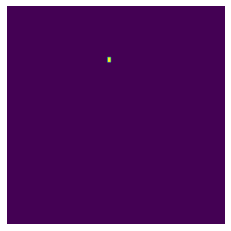

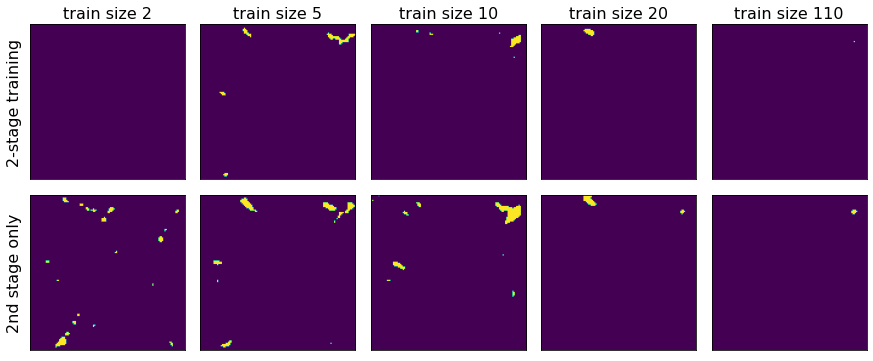

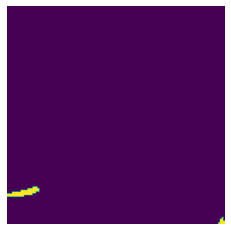

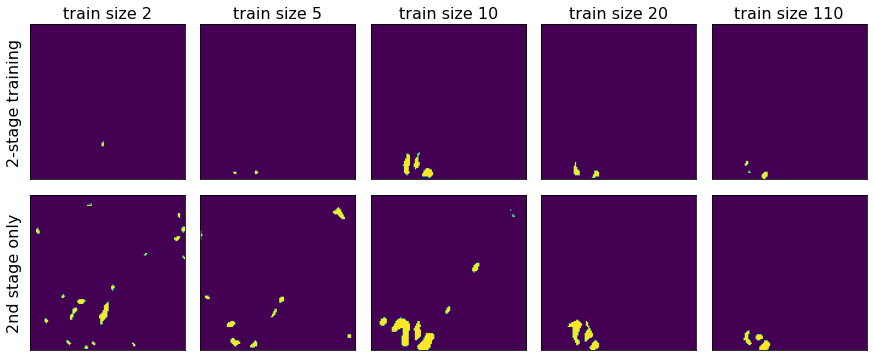

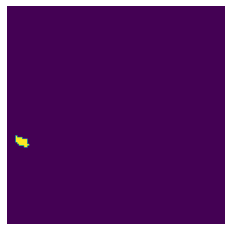

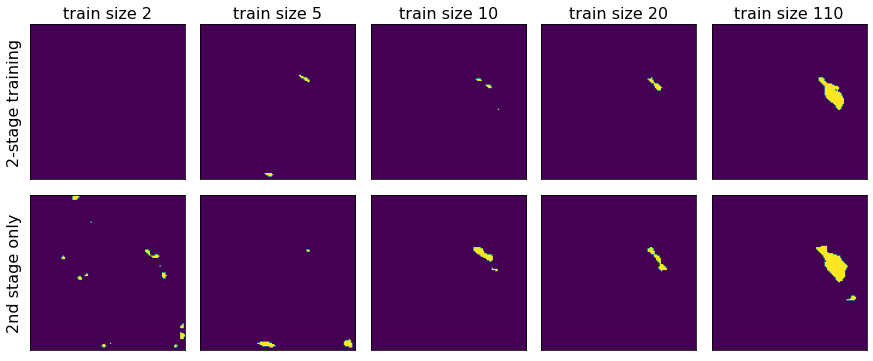

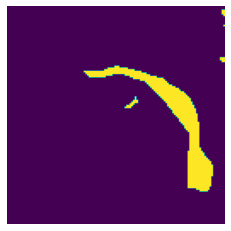

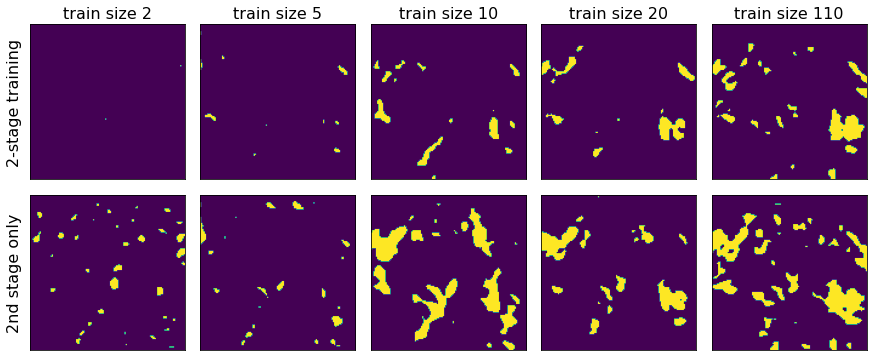

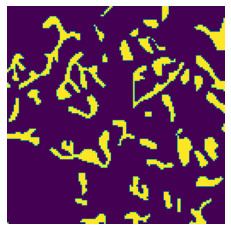

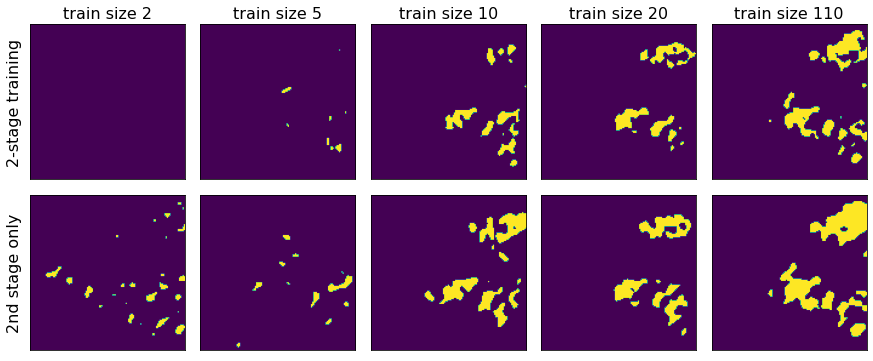

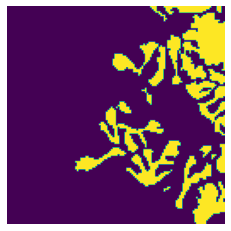

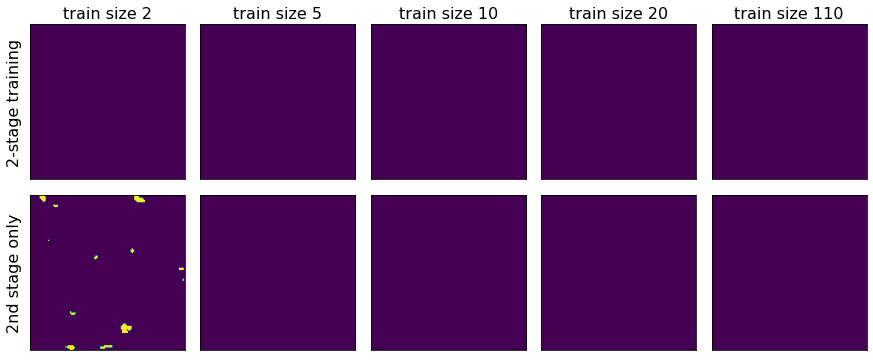

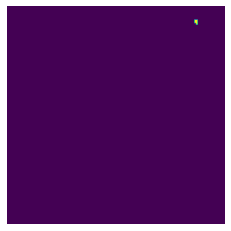

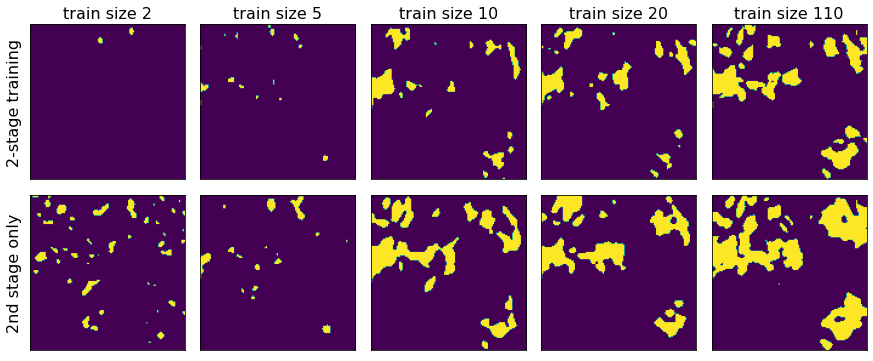

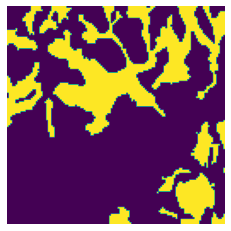

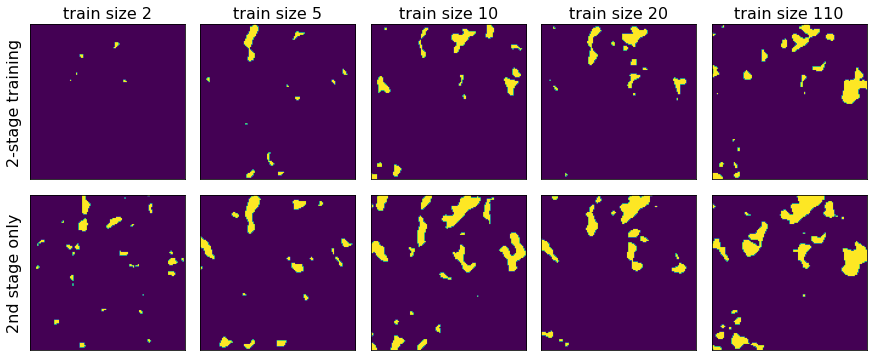

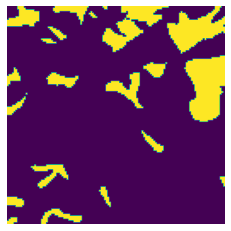

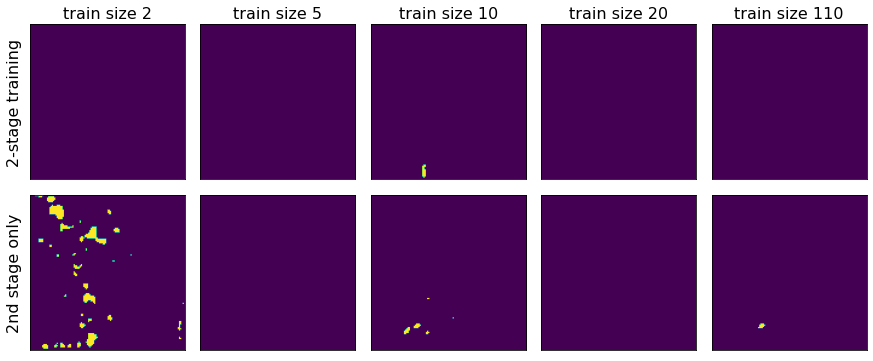

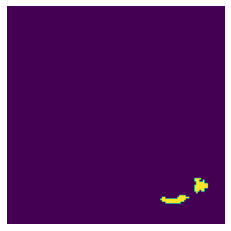

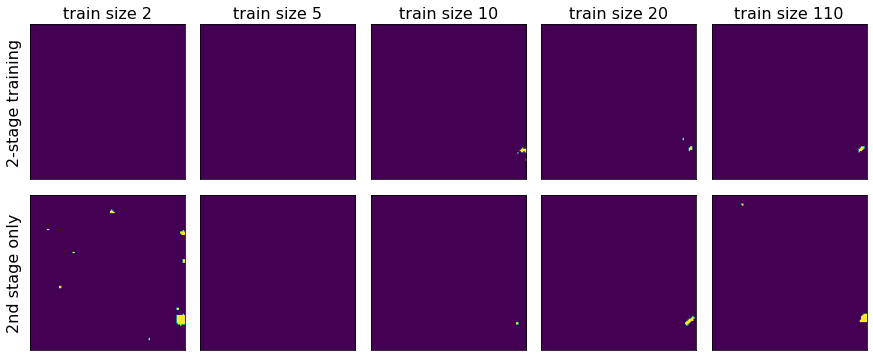

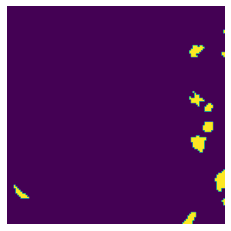

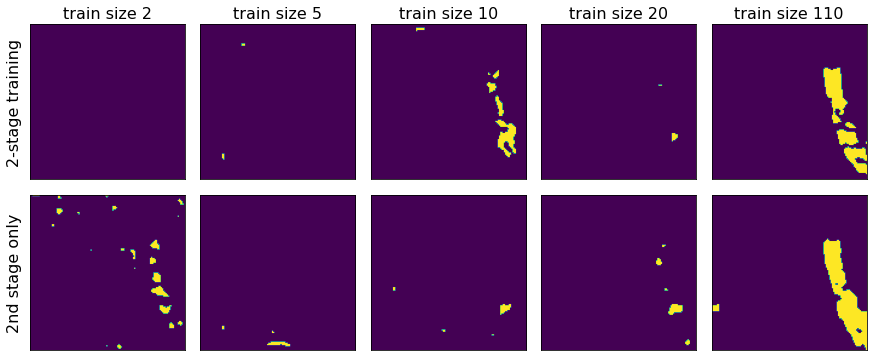

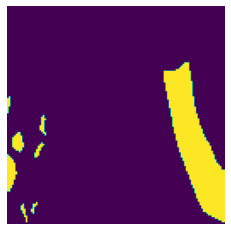

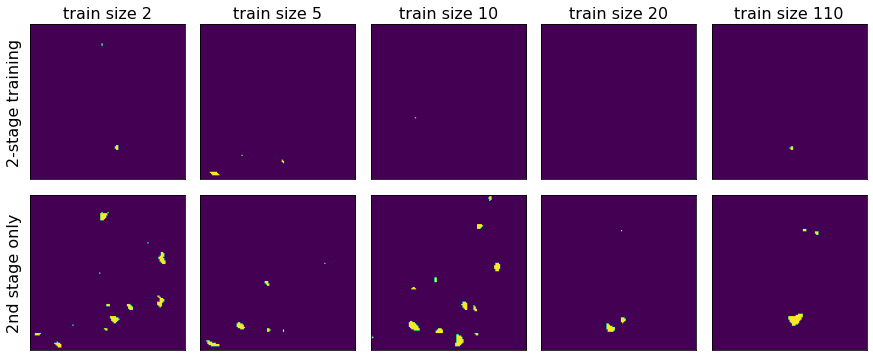

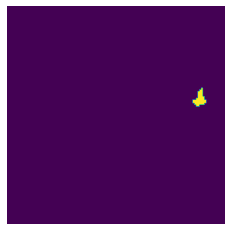

In [40]:
for index in range(len(maps[trainsize]['pretrain']['l'])):
    f, ax=plt.subplots(2,5, figsize=(15,6))
    for ii, trainsize in enumerate(trainsizes):
        ax[0,ii].set_title('train size {}'.format(trainsize),fontsize=16)
        if trainsize==-1:
            ax[0,ii].set_title('train size {}'.format(110),fontsize=16)
        ax[0,ii].imshow(maps[trainsize]['pretrain']['l'][index]>0.5)
        #ax[0,ii].axis('off')
        ax[1,ii].imshow(maps[trainsize]['no_pretrain']['l'][index]>0.5)
        #ax[1,ii].set_ylabel(trainsize)
        if trainsize==2:
            ax[0,ii].set_ylabel('2-stage training',fontsize=16)
            ax[1,ii].set_ylabel('2nd stage only',fontsize=16)
        ax[1,ii].set_xticks([])
        ax[1,ii].set_yticks([])
        ax[0,ii].set_xticks([])
        ax[0,ii].set_yticks([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    ax[0,ii].get_yaxis().set_visible(False)
    plt.show()
    plt.imshow(np.squeeze(labels[index]))
    plt.axis('off')
    plt.show()

/tmp/ipykernel_3427/3814888036.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax=plt.subplots(2,5, figsize=(15,6))


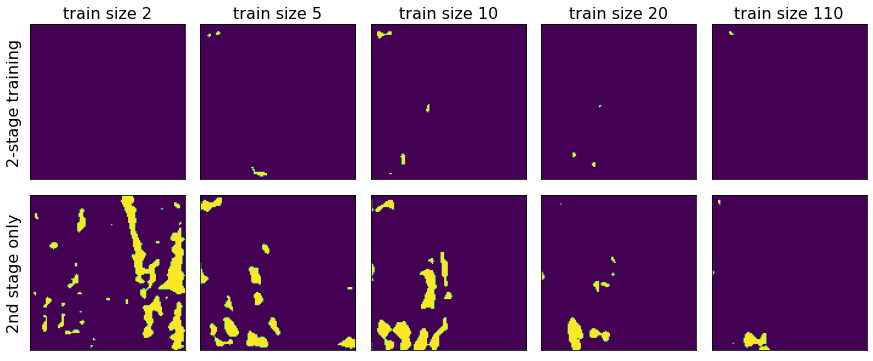

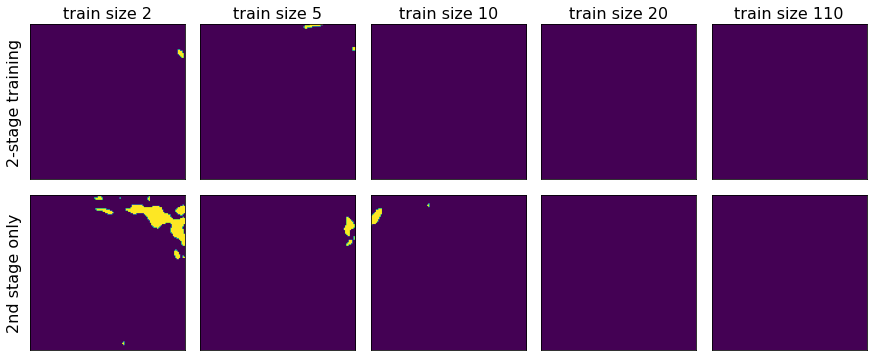

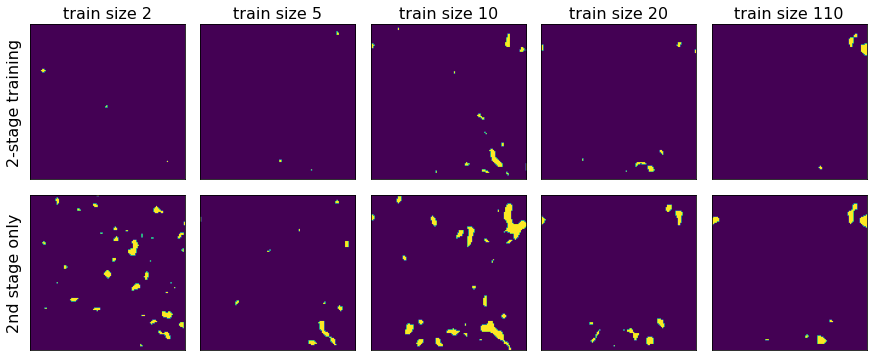

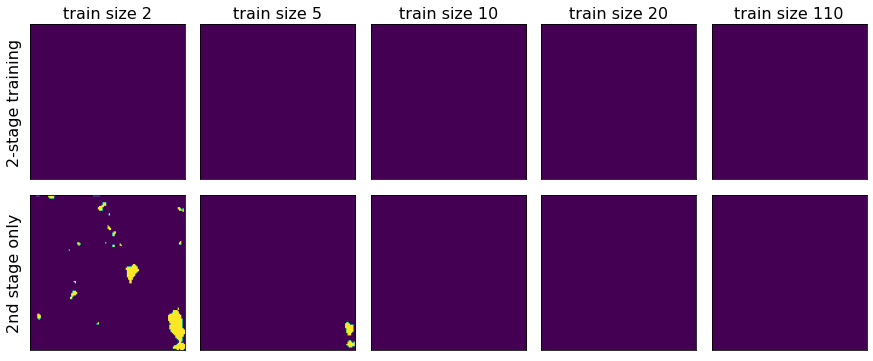

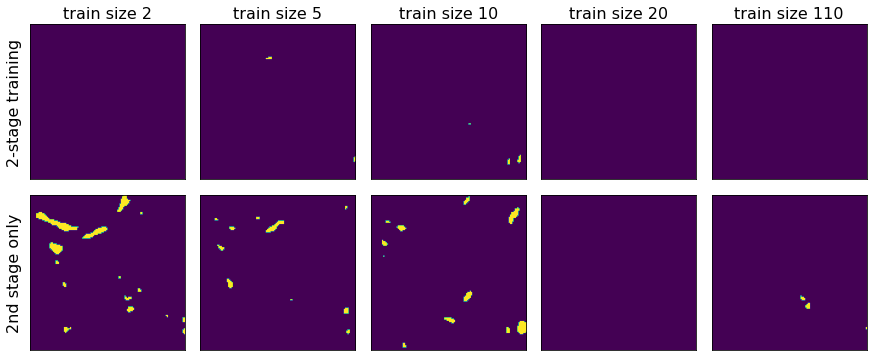

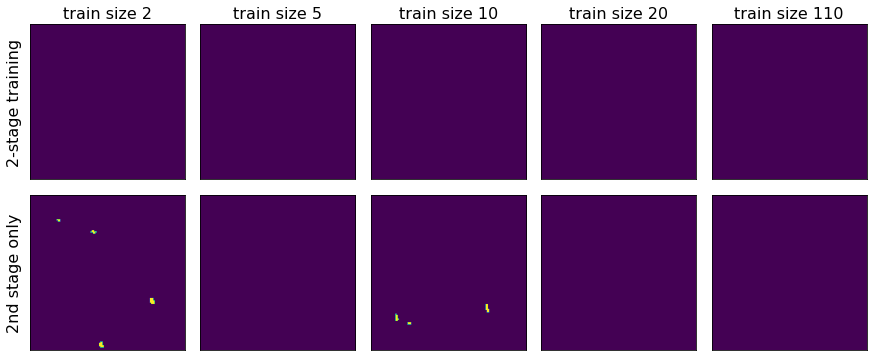

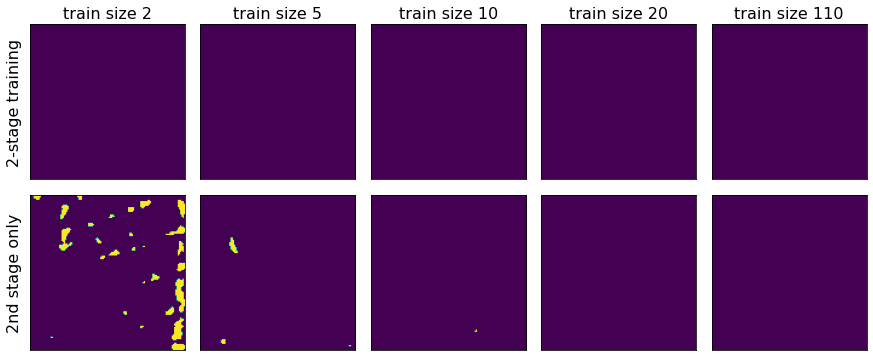

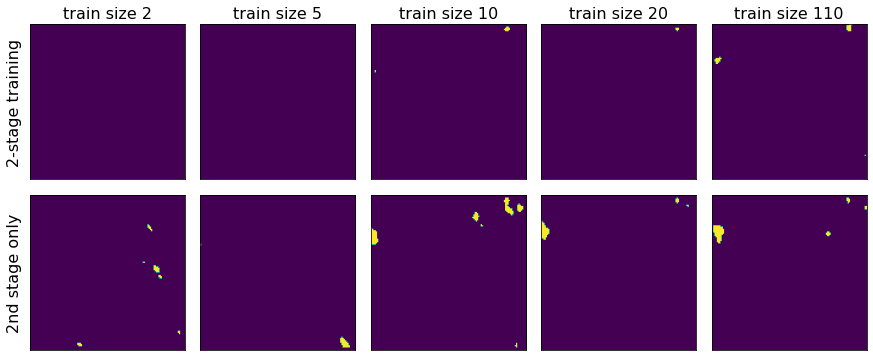

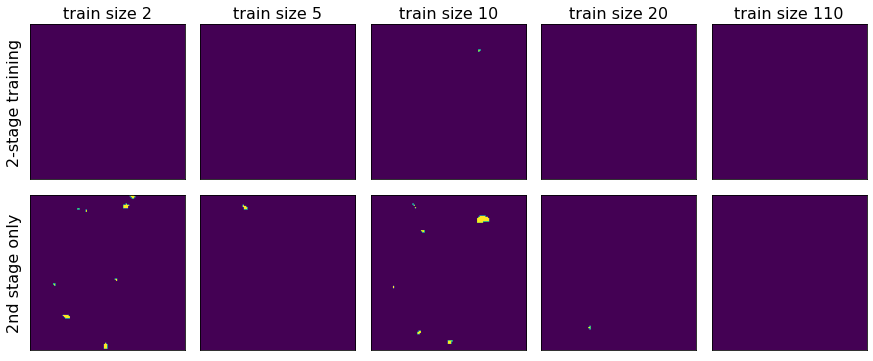

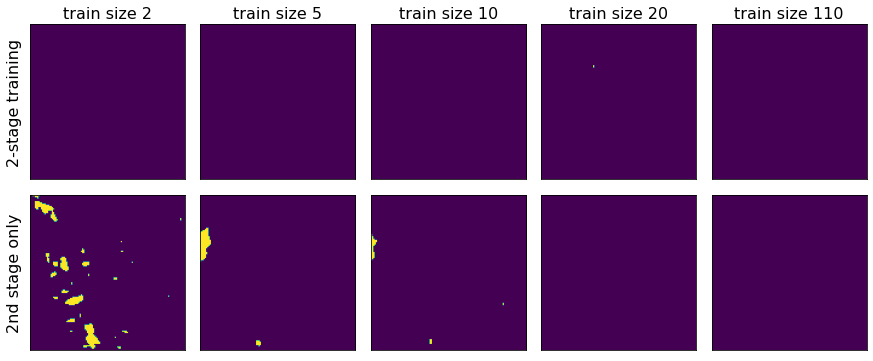

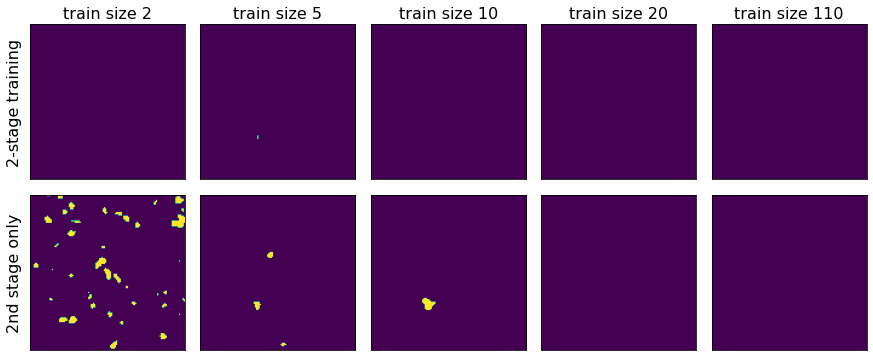

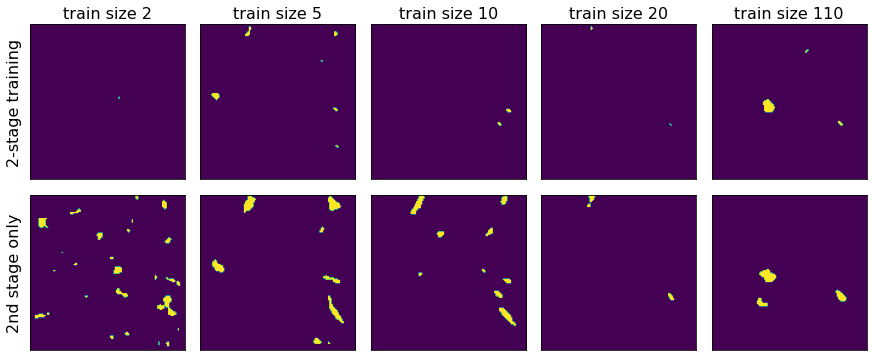

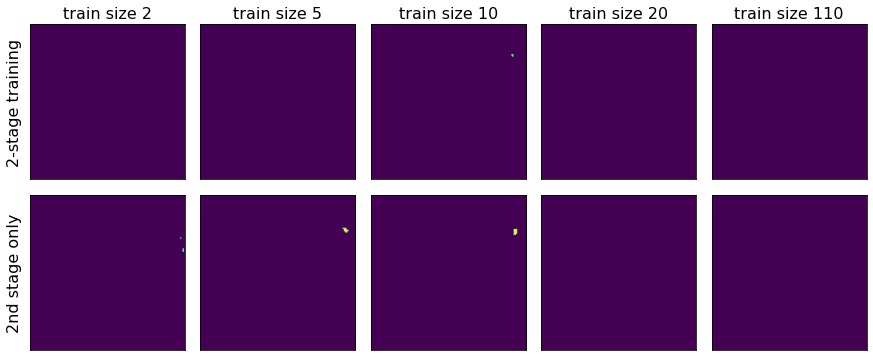

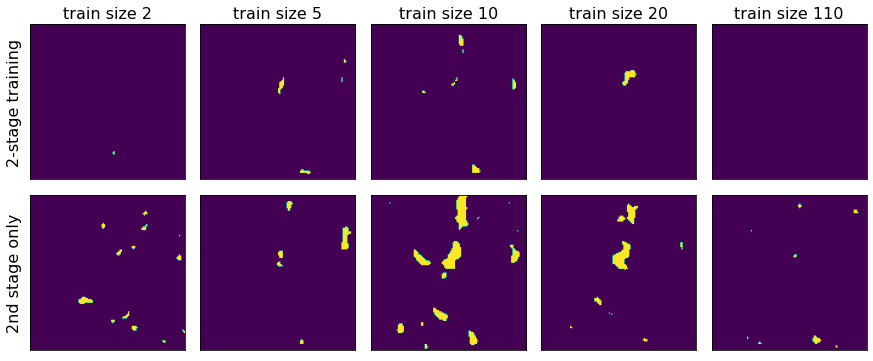

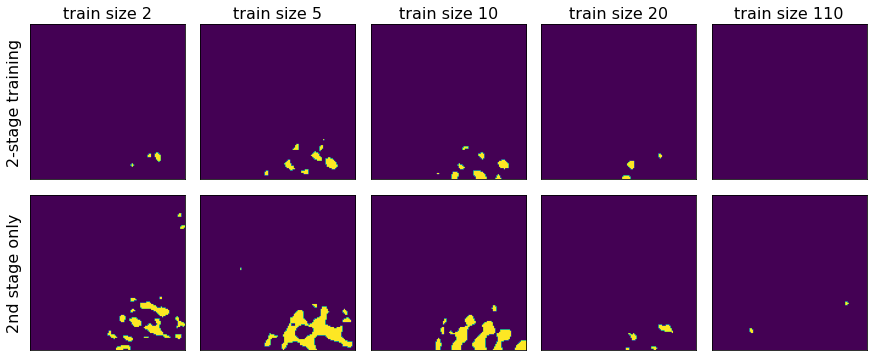

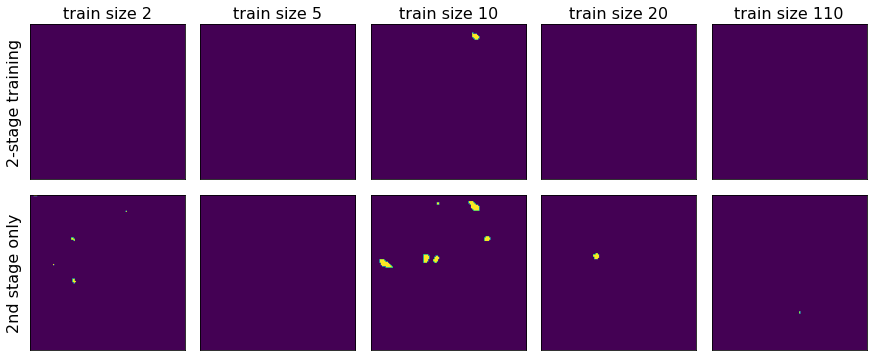

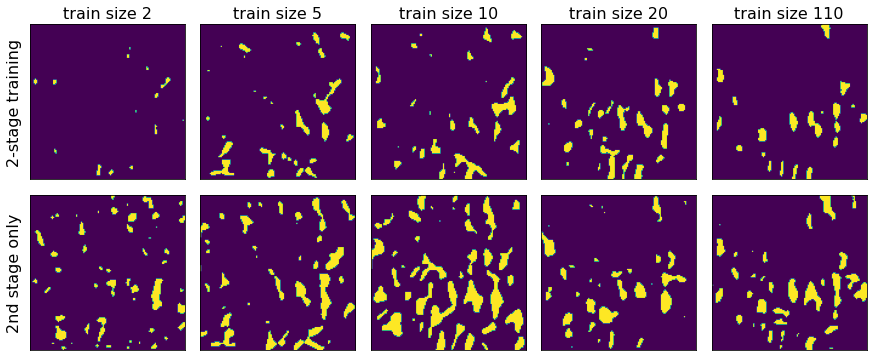

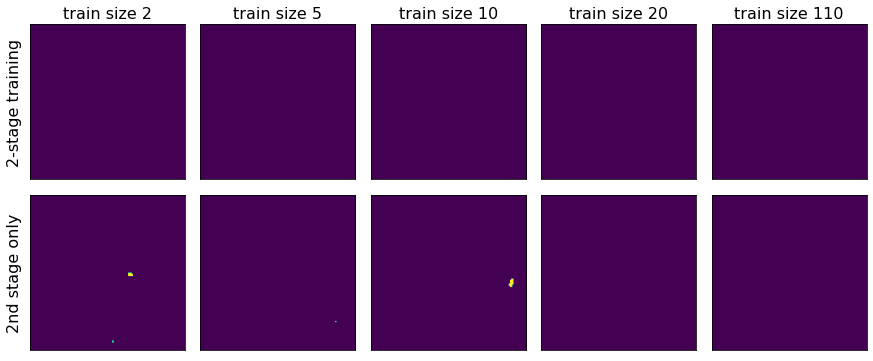

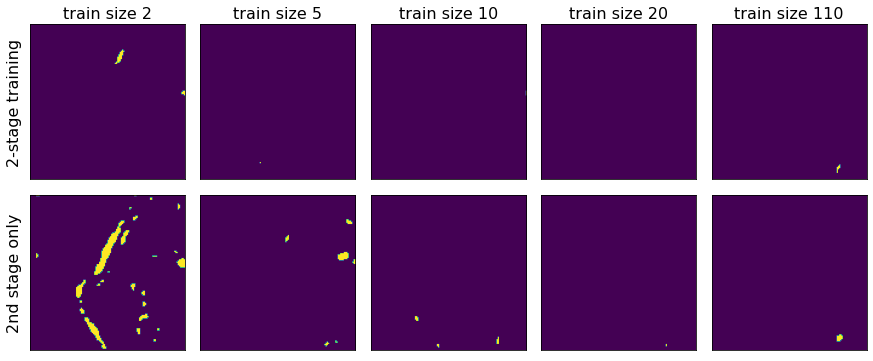

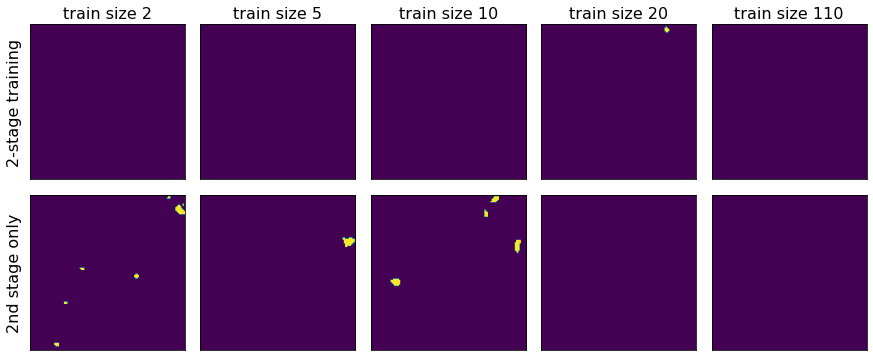

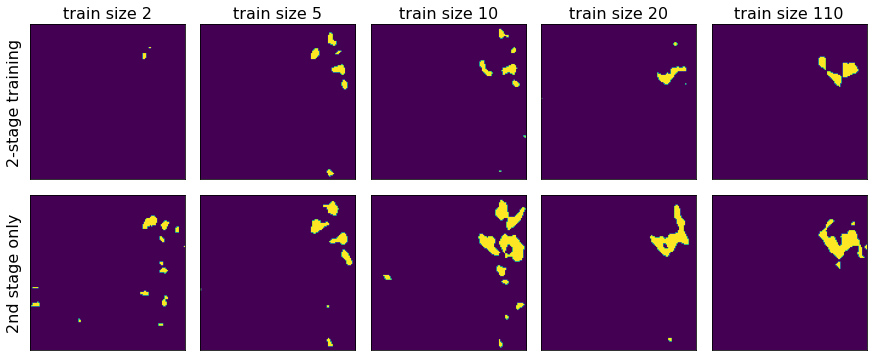

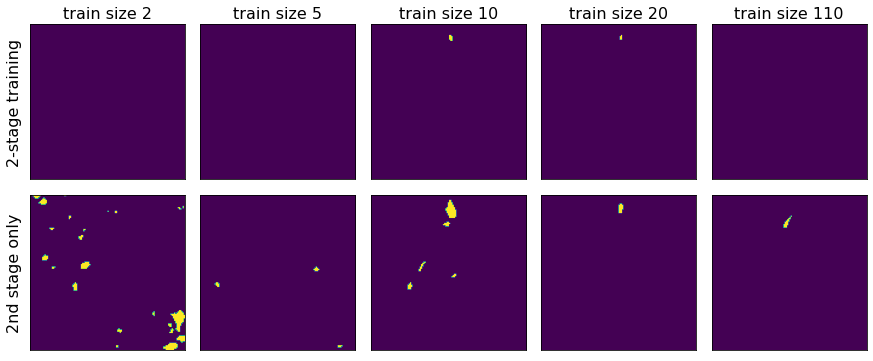

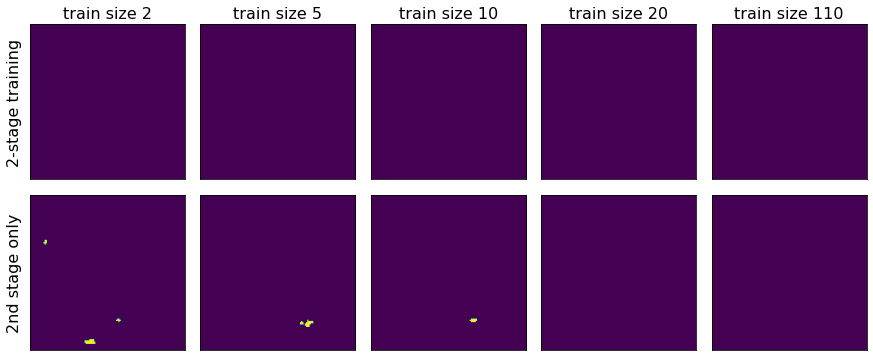

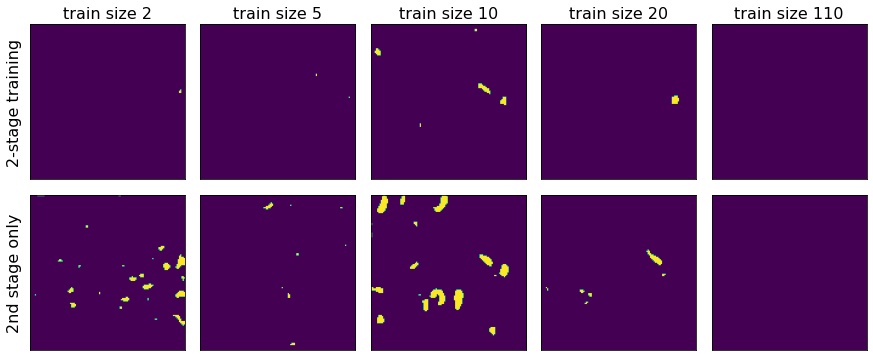

In [41]:
for index in range(len(maps[trainsize]['pretrain']['nl'])):
    f, ax=plt.subplots(2,5, figsize=(15,6))
    for ii, trainsize in enumerate(trainsizes):
        ax[0,ii].set_title('train size {}'.format(trainsize),fontsize=16)
        if trainsize==-1:
            ax[0,ii].set_title('train size {}'.format(110),fontsize=16)
        ax[0,ii].imshow(maps[trainsize]['pretrain']['nl'][index]>0.5)
        #ax[0,ii].axis('off')
        ax[1,ii].imshow(maps[trainsize]['no_pretrain']['nl'][index]>0.5)
        #ax[1,ii].set_ylabel(trainsize)
        if trainsize==2:
            ax[0,ii].set_ylabel('2-stage training',fontsize=16)
            ax[1,ii].set_ylabel('2nd stage only',fontsize=16)
        ax[1,ii].set_xticks([])
        ax[1,ii].set_yticks([])
        ax[0,ii].set_xticks([])
        ax[0,ii].set_yticks([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    ax[0,ii].get_yaxis().set_visible(False)


In [147]:

def make_box_plot(variable, ylabel, label='mean'):

    heights_pretrain_hokk = [results['Hokkaido'][trainsize]['pretrain'][variable+'_'+label] for trainsize in trainsizes]
    heights_pretrain_kaik = [results['Kaikoura'][trainsize]['pretrain'][variable+'_'+label] for trainsize in trainsizes]

    heights_no_pretrain1  = [results['Hokkaido'][trainsize]['no_pretrain'][variable+'_'+label] for trainsize in trainsizes]
    heights_no_pretrain2  = [results['Kaikoura'][trainsize]['no_pretrain'][variable+'_'+label] for trainsize in trainsizes]


    yerr_pretrain_hokk = [results['Hokkaido'][trainsize]['pretrain'][variable+'_std'] for trainsize in trainsizes]
    yerr_pretrain_kaik = [results['Kaikoura'][trainsize]['pretrain'][variable+'_std'] for trainsize in trainsizes]
    yerr_no_pretrain = [results['Hokkaido'][trainsize]['no_pretrain'][variable+'_std'] for trainsize in trainsizes]


    barWidth = 0.25
    fig = plt.subplots(figsize =(8,5))
    #plt.title('1. stage trained on {}'.format(pretraining), fontsize=18)


    # Set position of bar on X axis
    br1 = np.arange(len(heights_pretrain_hokk))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    #br4 = [x + barWidth for x in br3]

    # Make the plot
    plt.bar(br2, heights_pretrain_hokk, yerr=yerr_pretrain_hokk, color ='blue', width = barWidth,
            edgecolor ='grey', label ='Hokkaido pretraining')
    plt.bar(br3, heights_pretrain_kaik, yerr=yerr_pretrain_kaik, color ='green', width = barWidth,
            edgecolor ='grey', label ='Kaikoura pretraining')
    plt.bar(br1, heights_no_pretrain1, yerr=yerr_no_pretrain, color ='orange', width = barWidth,
            edgecolor ='grey', label ='no pretraining')
    # plt.bar(br2, heights_no_pretrain2, yerr=yerr_no_pretrain, color ='orange', width = barWidth,
    #         edgecolor ='grey', label ='no pretraining')

    # Adding Xticks
    plt.xlabel('number of chips in training set', fontsize = 16)
    plt.ylabel(ylabel, fontsize =16)
    plt.xticks([r + barWidth for r in range(len(heights_pretrain_hokk))], trainsizes[:-1]+[110], fontsize=16)

    plt.legend(fontsize=15)
    plt.show()

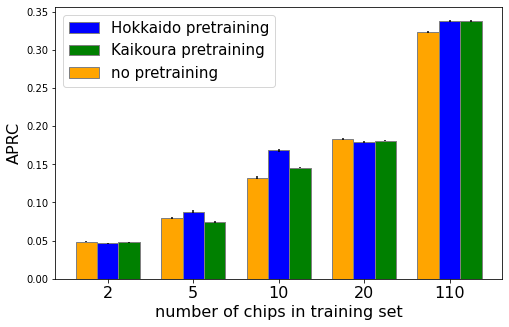

In [149]:
make_box_plot('APRC_all', 'APRC', 'mean')

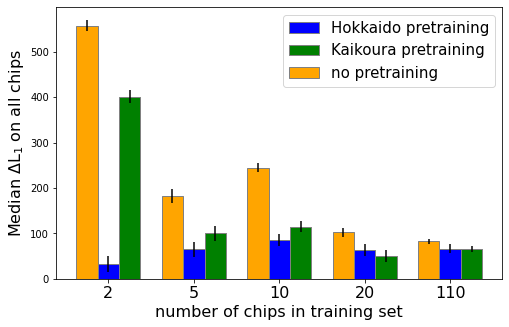

In [150]:
make_box_plot('l1_all', 'Median $\Delta \mathrm{L}_1 $ on all chips', label='median')

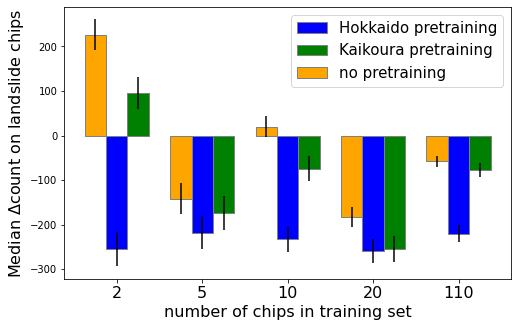

In [151]:
make_box_plot('sl1_l', 'Median $\Delta \mathrm{count}$ on landslide chips', label='median')

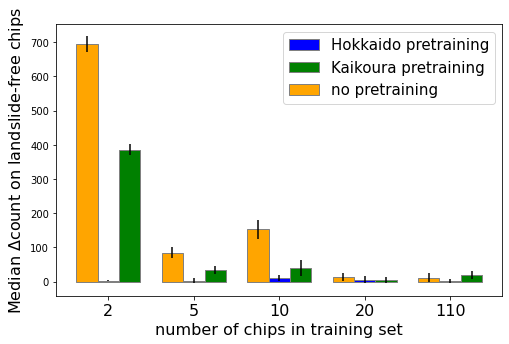

In [152]:
make_box_plot('sl1_nl', 'Median $\Delta \mathrm{count}$ on landslide-free chips', label='median')

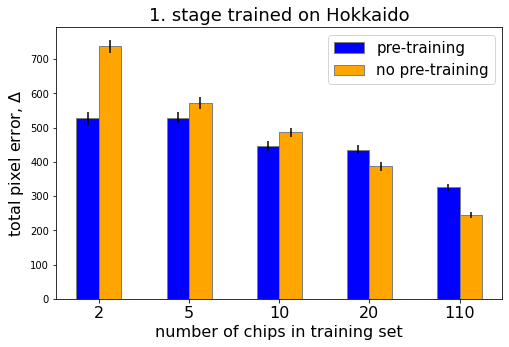

In [11]:

heights_pretrain = [results[trainsize]['pretrain']['l1_all_mean'] for trainsize in trainsizes]
heights_no_pretrain = [results[trainsize]['no_pretrain']['l1_all_mean'] for trainsize in trainsizes]

yerr_pretrain = [results[trainsize]['pretrain']['l1_all_std'] for trainsize in trainsizes]
yerr_no_pretrain = [results[trainsize]['no_pretrain']['l1_all_std'] for trainsize in trainsizes]


barWidth = 0.25
fig = plt.subplots(figsize =(8,5))
plt.title('1. stage trained on {}'.format(pretraining), fontsize=18)


# Set position of bar on X axis
br1 = np.arange(len(heights_pretrain))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, heights_pretrain, yerr=yerr_pretrain, color ='blue', width = barWidth,
        edgecolor ='grey', label ='pre-training')
plt.bar(br2, heights_no_pretrain, yerr=yerr_pretrain, color ='orange', width = barWidth,
        edgecolor ='grey', label ='no pre-training')

# Adding Xticks
plt.xlabel('number of chips in training set', fontsize = 16)
plt.ylabel(r'total pixel error, $\Delta$', fontsize =16)
plt.xticks([r + barWidth/2 for r in range(len(heights_pretrain))], trainsizes[:-1]+[110], fontsize=16)

plt.legend(fontsize=15)
plt.show()

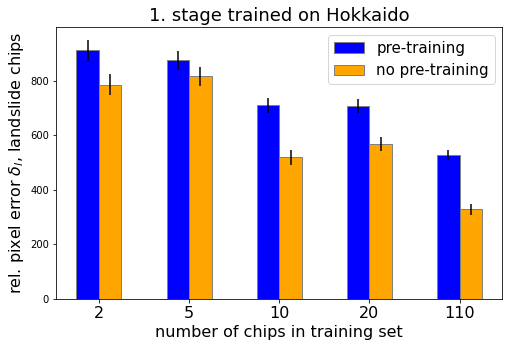

In [16]:

heights_pretrain = [results[trainsize]['pretrain']['l1_l_mean'] for trainsize in trainsizes]
heights_no_pretrain = [results[trainsize]['no_pretrain']['l1_l_mean'] for trainsize in trainsizes]

yerr_pretrain = [results[trainsize]['pretrain']['l1_l_std'] for trainsize in trainsizes]
yerr_no_pretrain = [results[trainsize]['no_pretrain']['l1_l_std'] for trainsize in trainsizes]


barWidth = 0.25
fig = plt.subplots(figsize =(8,5))
plt.title('1. stage trained on {}'.format(pretraining), fontsize=18)


# Set position of bar on X axis
br1 = np.arange(len(heights_pretrain))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, heights_pretrain, yerr=yerr_pretrain, color ='blue', width = barWidth,
        edgecolor ='grey', label ='pre-training')
plt.bar(br2, heights_no_pretrain, yerr=yerr_pretrain, color ='orange', width = barWidth,
        edgecolor ='grey', label ='no pre-training')

# Adding Xticks
plt.xlabel('number of chips in training set', fontsize = 16)
plt.ylabel('rel. pixel error $\delta_l$, landslide chips', fontsize =16)
plt.xticks([r + barWidth/2 for r in range(len(heights_pretrain))], trainsizes[:-1]+[110], fontsize=16)

plt.legend(fontsize=15)
plt.show()

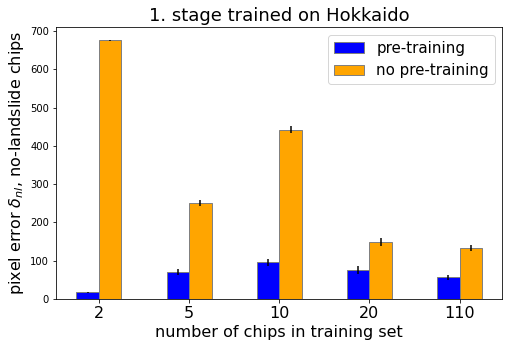

In [13]:
heights_pretrain = [results[trainsize]['pretrain']['l1_nl_mean'] for trainsize in trainsizes]
heights_no_pretrain = [results[trainsize]['no_pretrain']['l1_nl_mean'] for trainsize in trainsizes]

yerr_pretrain = [results[trainsize]['pretrain']['l1_nl_std'] for trainsize in trainsizes]
yerr_no_pretrain = [results[trainsize]['no_pretrain']['l1_nl_std'] for trainsize in trainsizes]


barWidth = 0.25
fig = plt.subplots(figsize =(8,5))
plt.title('1. stage trained on {}'.format(pretraining), fontsize=18)


# Set position of bar on X axis
br1 = np.arange(len(heights_pretrain))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, heights_pretrain, yerr=yerr_pretrain, color ='blue', width = barWidth,
        edgecolor ='grey', label ='pre-training')
plt.bar(br2, heights_no_pretrain, yerr=yerr_pretrain, color ='orange', width = barWidth,
        edgecolor ='grey', label ='no pre-training')

# Adding Xticks
plt.xlabel('number of chips in training set', fontsize = 16)
plt.ylabel('pixel error $\delta_{nl}$, no-landslide chips', fontsize =16)
plt.xticks([r + barWidth/2 for r in range(len(heights_pretrain))], trainsizes[:-1]+[110], fontsize=16)

plt.legend(fontsize=15)
plt.show()